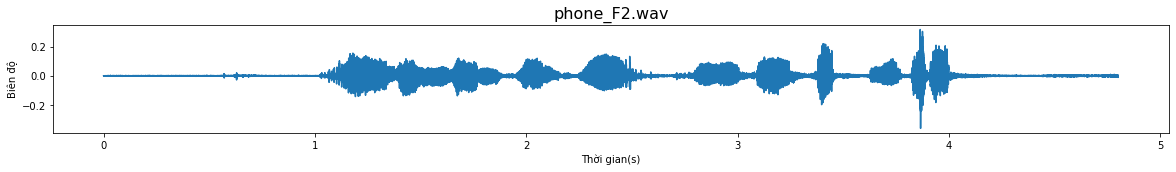

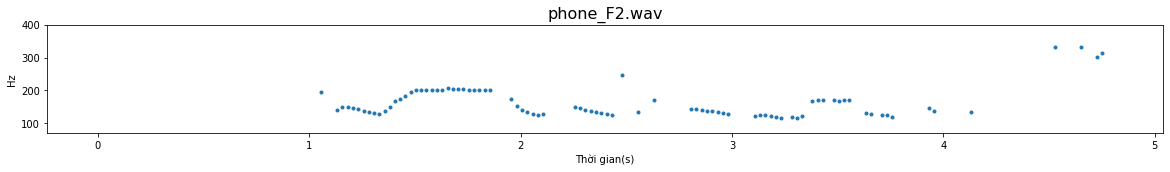

MEAN:  162.75051266155273
STD:  46.28916169835535


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
from IPython.display import Audio
import statsmodels.api as sm
from scipy.signal import find_peaks


# input: mảng 1 chiều chứa giá trị biên độ và tần số của tín hiệu
# output: mảng 2 chiều chứa các khung, mỗi khung chứa các mẫu của tín hiệu

def Split_data(data,Fs):
    N=int (0.025*Fs)    # độ dài khung (đơn vị: mẫu)
    index=[N*i for i in range(int(len(data)/N))]    # tạo mảng các chỉ số đầu của từng khung
    fr_arr=[]    
    for i in range (int(len(data)/N)):
        fr_arr.append(data[index[i]:(index[i]+N)])    # thêm lần lượt từng khung vào mảng
        
    return fr_arr    

#-----------------------------------------------------------------------------------------------------------

# input: mảng 2 chiều chứa các khung, mỗi khung chứa các mẫu của tín hiệu
# output: mảng 2 chiều chứa các khung đã qua xử lý ACF

def Autocorrelation(fr_arr):
    acf_arr=[]    
    N=len(fr_arr[0])
    for i in range (len(fr_arr)):    #duyệt từng khung
        xx=[0]*N    
        for n in range (N):    # tính ACF theo độ trễ n của khung
            xx[n]=sum([fr_arr[i][m]*fr_arr[i][m+n] for m in range (N-n)])    
        acf_arr.append(xx)    # thêm khung đã qua ACF vào mảng 
    return acf_arr

#-----------------------------------------------------------------------------------------------------------

# input: mảng 2 chiều chứa các khung đã qua xử lý ACF
# output: mảng 2 chiều chứa các khung đã qua xử lý ACF và được chuẩn hoá về 0,1

def Normalize(fr_arr):  
    nor_arr=[]    
    for i in range (len(fr_arr)): 
        # tìm min và max của khung
        min_data=min(fr_arr[i])    
        max_data=max(fr_arr[i])    
        
        # chuẩn hoá khung
        nor_fr = []    
        for j in range (len(fr_arr[0])):   
            nor_fr.append((fr_arr[i][j]-min_data)/(max_data-min_data))  
            
        # đưa khung đã chuẩn hoá vào nor_arr
        nor_arr.append(nor_fr)    
    
    return nor_arr

#-----------------------------------------------------------------------------------------------------------

# input: mảng F0 
# output: in ra màn hình mean và std của mảng F0

def Mean_Std(F0_list):
    F0=[]
    # lọc ra các F0
    for i in range (len(F0_list)):
        if (F0_list[i]!=0):
            F0.append(F0_list[i])
            
    print("MEAN: ",np.mean(F0))
    print("STD: ",np.std(F0))
    
#-----------------------------------------------------------------------------------------------------------
    
# input: mảng 2 chiều chứa các khung đã qua ACF, ngưỡng, tần số và mảng biên độ của tín hiệu
# output: mảng chứa các F0 của các khung

def FindF0(fr_arr,threshold,Fs,data):
    fr_arr=np.array(fr_arr)
    F0_list=[0]*len(data)    # khai báo mảng F0 gồm len(data) phần tử rỗng
    N=len(fr_arr[0])
    index=[N*i for i in range(len(fr_arr))]    # tạo mảng các chỉ số đầu của từng khung
    
    # tìm các đỉnh trong vùng giới hạn
    lim_min=int((1/400)*Fs) 
    lim_max=int((1/70)*Fs)+1
    
    for i in range (len(fr_arr)):    
        peaks,_=find_peaks(fr_arr[i][lim_min:lim_max],height=threshold,distance=2)    
        peaks+=lim_min    
        
        # xác định V/UV và tìm đỉnh cao nhất
        if (len(peaks)!=0):    
            max_idx=0    
            for j in range (1,len(peaks)):    
                if (fr_arr[i][peaks[max_idx]]<fr_arr[i][peaks[j]]):    
                    max_idx=j    
            # tính F0
            F0_list[peaks[max_idx]+index[i]]=Fs/(peaks[max_idx]) 
            
    return F0_list

#-----------------------------------------------------------------------------------------------------------

# input: tên file wav, ngưỡng
# output: đồ thị tín hiệu và đường F0 của tín hiệu

def ACF_F0(name,threshold):
    
    Fs,data=read(name)    #đọc file âm thanh    
    data=data/32768  #đưa biên độ về khoảng -1 , 1

    fr_arr=Split_data(data,Fs)    # chia tín hiệu thành các khung
    fr_arr=Autocorrelation(fr_arr)    # tính tự tương quan của các khung
    fr_arr=Normalize(fr_arr)    # chuẩn hoá các khung

    F0_list=FindF0(fr_arr,threshold,Fs,data)    # tìm F0 của các khung
    
    # biểu diễn tín hiệu
    x=[i/Fs for i in range(len(data))]
    plt.figure(figsize = (20,2))    
    plt.plot(x,data)
    plt.title(name,fontsize=16)
    plt.ylabel('Biên độ')
    plt.xlabel('Thời gian(s)')
    plt.show()
    
    # biểu diễn đường F0
    plt.figure(figsize = (20,2))  
    plt.plot(x,F0_list,'.')
    plt.ylim((70,400))
    plt.ylabel('Hz')
    plt.xlabel('Thời gian(s)')
    plt.title(name,fontsize=16)
    plt.show()
    
    # in ra mean và std của đường F0
    Mean_Std(F0_list)

    
#-----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------

# Tín hiệu kiểm thử
threshold=0.6424868166489655

ACF_F0('phone_F2.wav',threshold)








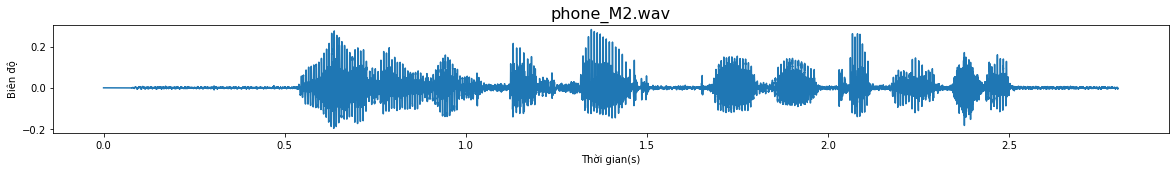

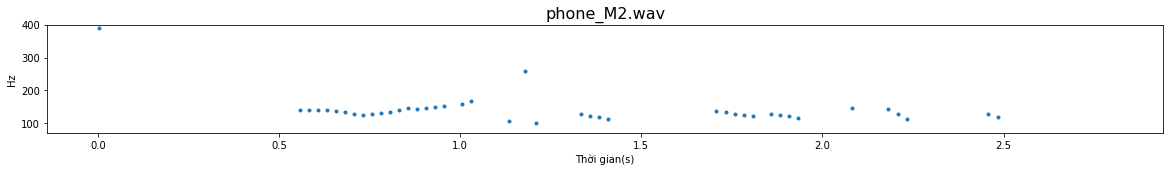

MEAN:  141.688838436833
STD:  45.30467784109609


In [5]:

ACF_F0('phone_M2.wav',threshold)


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_4796/33231370.py:52: RuntimeWarning: invalid value encountered in double_scalars
  nor_fr.append((fr_arr[i][j]-min_data)/(max_data-min_data))


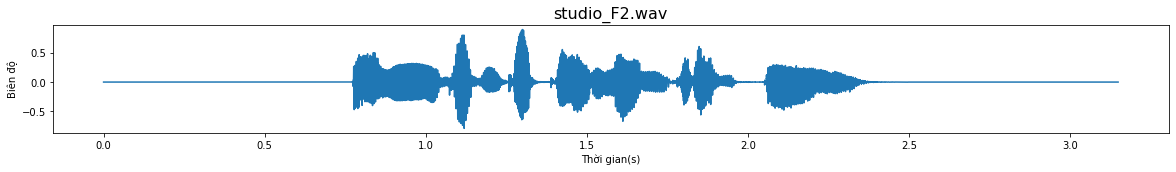

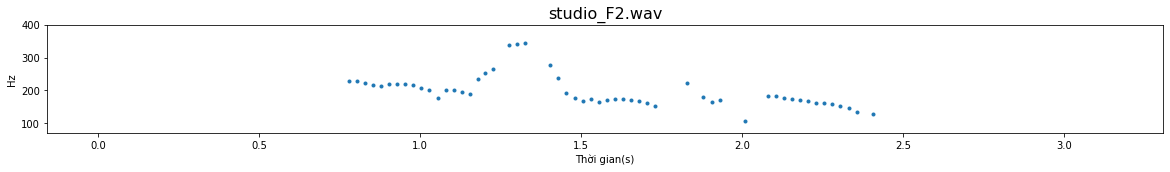

MEAN:  197.22347461510884
STD:  48.227718723899784


In [7]:

ACF_F0('studio_F2.wav',threshold)


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_4796/33231370.py:105: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs,data=read(name)    #đọc file âm thanh


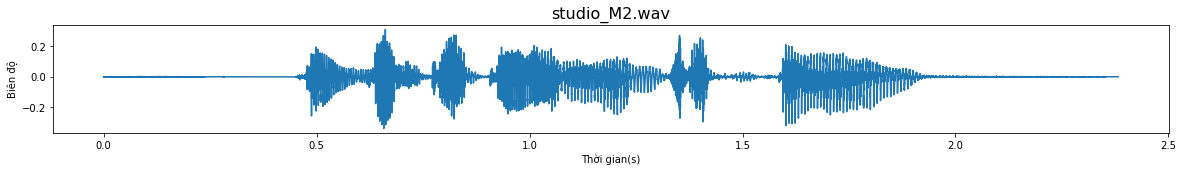

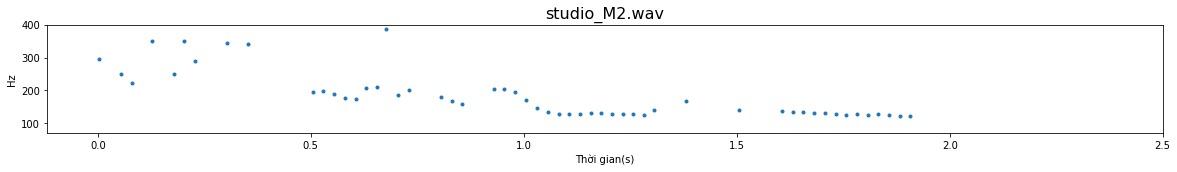

MEAN:  182.6653515418887
STD:  69.94053464970965


In [8]:

ACF_F0('studio_M2.wav',threshold)


In [ ]:
# Tín hiệu huấn luyện
#ACF_F0('phone_F1.wav',0.655231075027871)
#ACF_F0('phone_M1.wav',0.5852900147904238)
#ACF_F0('studio_F1.wav',0.7243128112127892)
#ACF_F0('studio_M1.wav',0.6051133655647778)